In [2]:
import dgl
import dgl.function as fn
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph
import numpy as np
import networkx as nx
#from res.plot_lib import set_default
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import Word2Vec
import random


Using backend: pytorch


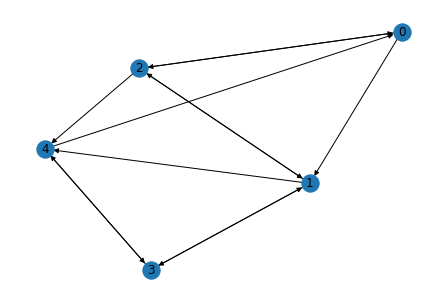

In [20]:
G = nx.read_edgelist('edge_list_short.txt', nodetype=int, create_using=nx.DiGraph())
labels = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'}
nx.draw(G, labels=labels)

In [21]:
G

In [22]:
nx.shortest_path(G, 3, 0)

[3, 4, 0]

In [23]:
for cycle in nx.simple_cycles(G):
    print(cycle)

[0, 2, 1, 4]
[0, 2, 1, 3, 4]
[0, 2]
[0, 2, 4]
[0, 1, 4]
[0, 1, 3, 4]
[0, 1, 2]
[0, 1, 2, 4]
[1, 4, 3]
[1, 3]
[1, 2]
[1, 2, 4, 3]
[3, 4]


In [24]:
list(G.neighbors(1))

[2, 3, 4]

In [31]:
G.edges()

OutEdgeView([(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (2, 0), (2, 1), (3, 4), (3, 1), (4, 3), (4, 0)])

In [8]:
c = 0
for edge in G.edges():
    G[edge[0]][edge[1]]['weight'] = c
    c = c+1


In [9]:
for i in range(5):
    G.nodes[i]['value'] = 3.14+i

In [16]:
dG =  dgl.DGLGraph()
dG.from_networkx(G, node_attrs=['value'], edge_attrs=['weight'])

In [17]:
dG

DGLGraph(num_nodes=5, num_edges=12,
         ndata_schemes={'value': Scheme(shape=(), dtype=torch.float32)}
         edata_schemes={'weight': Scheme(shape=(), dtype=torch.int64)})

In [18]:
dG.edata['weight']

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [19]:
dG.ndata['value']

tensor([3.1400, 4.1400, 5.1400, 6.1400, 7.1400])

In [33]:
dG.out_degrees()

tensor([2, 3, 3, 2, 2])

In [45]:
dG.in_degrees()

tensor([2, 3, 2, 2, 3])

In [65]:
dG.ndata['one'] = th.torch.ones(5)
dG.ndata['deg'] = dG.in_degrees().float()

In [66]:
dG.ndata['deg']

tensor([2., 3., 2., 2., 3.])

In [83]:
def message_func(edges):
    return {'x' : 2*edges.src['one'] }

def reduce_func(nodes):
    tot = th.torch.sum(nodes.mailbox['x'], dim=1)
    tot = tot+nodes.data['deg']
    return {'tot' : tot}

In [84]:
dG.register_message_func(message_func)
dG.register_reduce_func(reduce_func)

In [85]:
dG.send(dG.edges())
dG.recv(dG.nodes())

In [86]:
dG.ndata['tot']

tensor([6., 9., 6., 6., 9.])

In [91]:
dG.ndata['tot'] = th.zeros(5)
print(dG.ndata['tot'])
dG.update_all()

tensor([0., 0., 0., 0., 0.])


In [92]:
dG.ndata['tot']

tensor([6., 9., 6., 6., 9.])